This notebook shows how to generate image using input image and guided text by stable diffusion model. Read more on https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/img2img

# Install & Import

In [1]:
!pip install diffusers==0.16.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.1 MB/s eta 0:00:00


In [2]:
import torch
from PIL import Image
from diffusers import StableDiffusionImg2ImgPipeline
import numpy as np

# 2) Image-to-image

In [3]:
# @title Choose pretrained model
model_name = "runwayml/stable-diffusion-v1-5" # @param {type:"string"}

img2img = StableDiffusionImg2ImgPipeline.from_pretrained(model_name, torch_dtype=torch.float16)
img2img = img2img.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [4]:
!gdown 1VrJoIIQWrqUH7N8PYc52YhFCZeqld7Jp

Downloading...
From: https://drive.google.com/uc?id=1VrJoIIQWrqUH7N8PYc52YhFCZeqld7Jp
To: /content/Alien.png
100% 90.4k/90.4k [00:00<00:00, 98.6MB/s]


In [5]:
# @title Load input image
img_in = Image.open("/content/Alien.png")

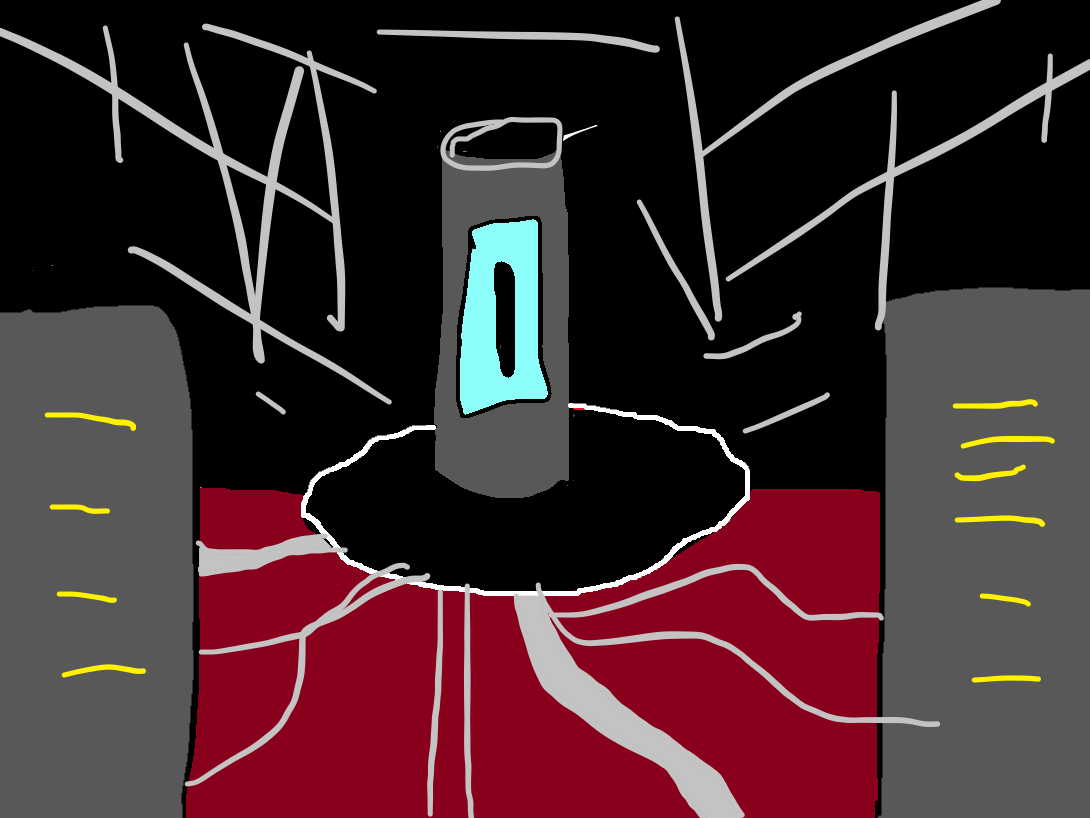

In [6]:
img_in

In [7]:
# @title Adjust Parameters
seed = 2110101 # @param {type:"integer"}
torch.cuda.manual_seed(seed)
sentence_1 = 'Vessel with fluid inside, dim light, highres' # @param {type:"string"}
sentence_2 = '((Control room)), buttons and panel, perfectly designed' # @param {type:"string"}
sentence_3 = 'futuristic interior, ultra detailed, nicely ordered wires on floor' # @param {type:"string"}
style = '((Hyperrealistic)) ((Cinematic)) ((Dramatic))' # @param {type:"string"}

prompt = ', '.join([sentence_1, sentence_2, sentence_3, style])
negative_prompt = 'Deformed, poor design, pipe, bad shape, unknown figures' # @param {type:"string"}

if len(negative_prompt) == 0:
  negative_prompt = None
num_inference_steps = 25 # @param {type:"slider", min:20, max:50, step:5}
guidance_scale = 7.5 # @param {type:"slider", min:0, max:10, step:0.5}
img = img2img(prompt=prompt,
              image=img_in,
              num_inference_steps=num_inference_steps,
              guidance_scale=guidance_scale,
              negative_prompt=negative_prompt).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

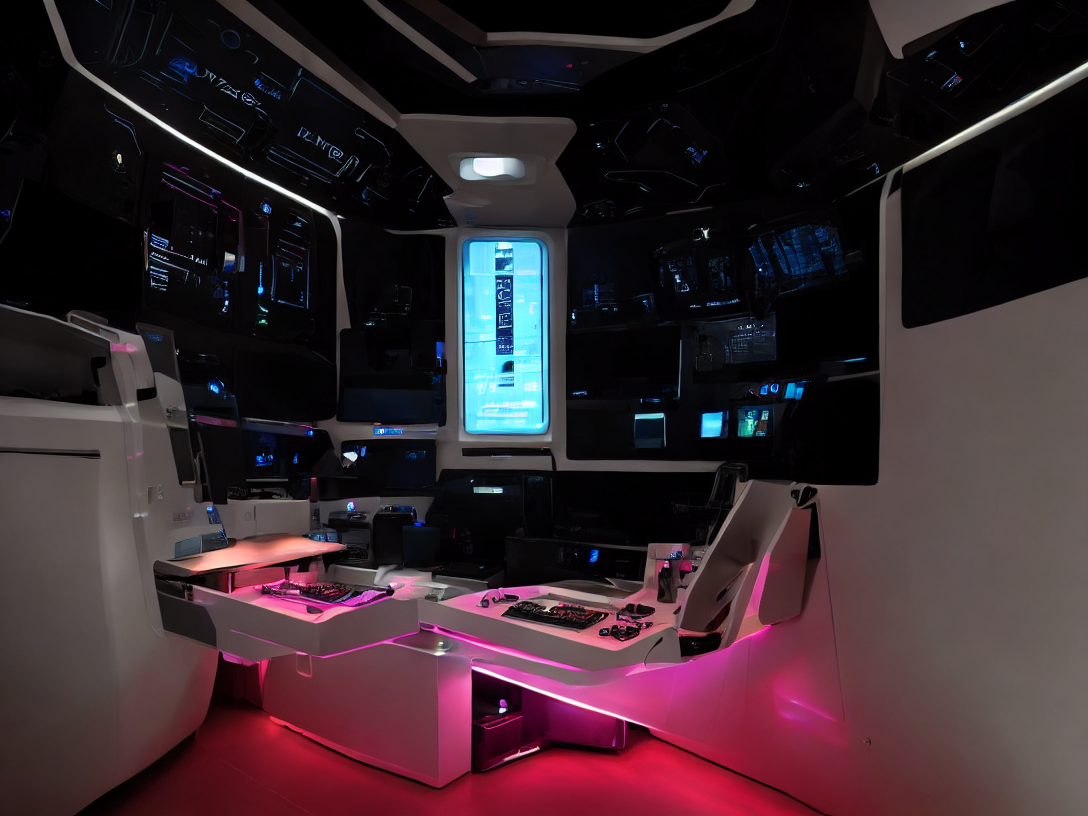

In [8]:
img